In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Importing **Libraries**

In [2]:
import pandas as pd
import re    # for regular expressions
import nltk  # for text manipulation
import string # for text manipulation
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import svm

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore") #ignore warnings

Read the **Data**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",encoding='latin-1',header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
df.shape

(1600000, 6)

**Add colomn names**

In [6]:
df_columns_name = ["target", "ids", "date", "flag", "user", "TweetText"]
df.columns = df_columns_name
df.head()

,target,ids,date,flag,user,TweetText
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


<Axes: >

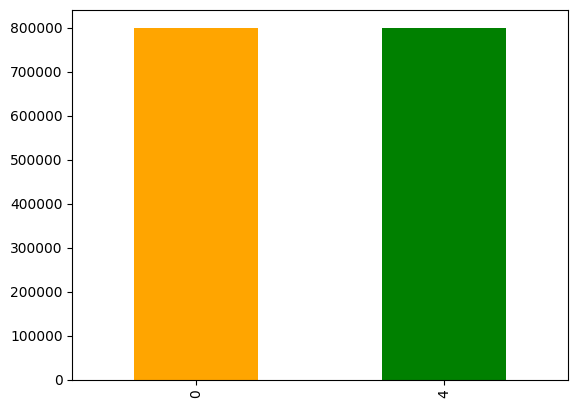

In [7]:
df['target'].value_counts().plot(kind='bar',color=["orange","green"])


**Count the target**

0    800000
4    800000
Name: target, dtype: int64


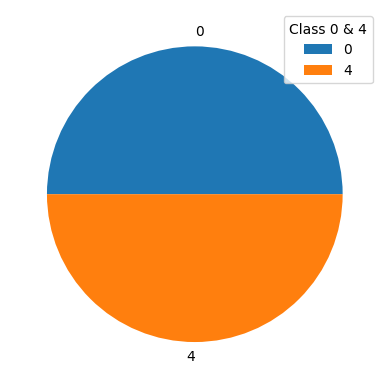

In [8]:
cls_cnt = df['target'].value_counts()
print(cls_cnt)
plt.pie([cls_cnt[0],cls_cnt[4]],labels=[0,4])
plt.legend(title = "Class 0 & 4",loc='best')

**TRY TO FIND REALATION WITH LENGHTH**

In [9]:
df_unhapy = df.loc[df['target']==0]
df_hapy = df.loc[df['target']==4]



*  Average tweet length



In [10]:
print(df['TweetText'].str.len().mean())

74.09011125




*   Average Word length of the tweet for seperate real and fake set



In [11]:
unhapy_wordlen = df_unhapy['TweetText'].str.split().apply(lambda x: len(x))
hapy_wordlen = df_hapy['TweetText'].str.split().apply(lambda x: len(x))
print(f'The Mean of Fake class = {unhapy_wordlen.mean()}')
print(f'The Mean of Real class = {hapy_wordlen.mean()}')

The Mean of Fake class = 13.58198375
The Mean of Real class = 12.7703175


**Mean Word count of both the classes**

In [12]:
import seaborn as sns

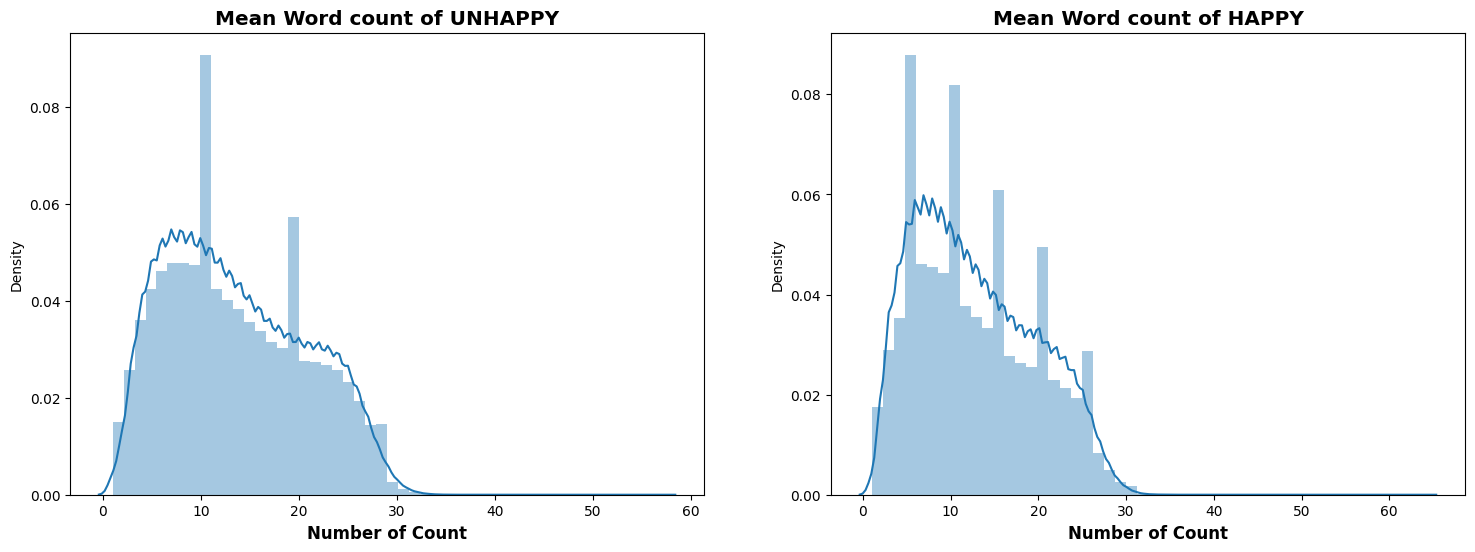

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title("Mean Word count of UNHAPPY",weight='bold',fontsize='x-large')
sns.distplot(unhapy_wordlen.map(lambda x: np.mean(x)))
plt.xlabel('Number of Count',weight='bold',fontsize='large')
plt.subplot(122)
plt.title("Mean Word count of HAPPY",weight='bold',fontsize='x-large')
sns.distplot(hapy_wordlen.map(lambda x: np.mean(x)))
plt.xlabel('Number of Count',weight='bold',fontsize='large')
plt.show()

**drop all the colomns except target variable and tweets text**

In [14]:
# Let's keep only target variable and tweets text
data = df
df.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [15]:
df.head()

,target,TweetText
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [16]:
df_positive_tweet = df[df.target==4].iloc[:18000,:]
df_negative_tweet = df[df.target==0].iloc[:2000,:]
print(df_positive_tweet.shape)
print(df_negative_tweet.shape)

(18000, 2)
(2000, 2)


In [17]:
df_tweetdata = pd.concat([df_positive_tweet,df_negative_tweet],axis = 0)
print(df_tweetdata.shape)
df_tweetdata.head()

(20000, 2)


,target,TweetText
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800003,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800004,4,@LovesBrooklyn2 he has that effect on everyone


**Data Cleaning**

In [18]:
#Check for missing values
df_tweetdata.isnull().sum()

# 100*df_tweetdata.isna().sum()/len(df_tweetdata)

target       0
TweetText    0
dtype: int64

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stopwords=nltk.corpus.stopwords.words('english')

**Clean Tweets**

In [21]:
def Stopwords_Removal(text):
    lst = " "
    clean_text=lst.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [22]:
from nltk.stem.porter import PorterStemmer
def Tweets_cleanup(df_tweetdata):
    str_1 = ""
    str_2 = " "

    # Remove handle (@)
    df_tweetdata['clean_tweet'] = df_tweetdata['TweetText'].str.replace("@", str_1)

    # Remove all Links (https...)
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].str.replace(r"http\S+", str_1)

    # Remove Punctuations & Special characters
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].str.replace("[^a-zA-Z]", str_2)

    # Remove the Stop words
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].apply(lambda text : Stopwords_Removal(text.lower()))

    # Split the text and tokenize it
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].apply(lambda lm: lm.split())

    # Now apply Stemmer (Porter)
    stemmer = PorterStemmer()
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].apply(lambda lm: [stemmer.stem(i) for i in lm])

    # Stitch back words
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].apply(lambda lm: ' '.join([w for w in lm]))

    # Remove small words
    df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].apply(lambda lm: ' '.join([w for w in lm.split() if len(w)>3]))


In [23]:
Tweets_cleanup(df_tweetdata)


In [24]:
df_tweetdata.head()

,target,TweetText,clean_tweet
800000,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet best
800001,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,meet besti tonight cant wait girl talk
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter sunisa meet show area sweetheart
800003,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much real food friend make soup
800004,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


In [25]:
# pip install pyspellchecker

In [26]:
# aa = " "

In [27]:
# type(aa)

In [28]:
# a=1

In [29]:
# type(df_tweetdata['TweetText'])

In [30]:
# pip install textblob

In [31]:
tt=df_tweetdata

from textblob import TextBlob
def correct_spellings(text):
    corrected_text = []
    # misspelled_words = spell.unknown(text.split())
    for word in text.split():
        tp = TextBlob(word)
        
        corrected_text.append(str(tp.correct()));
        # if word in misspelled_words:
        #     corrected_text.append(spell.correction(word))
        # else:   
        #     corrected_text.append(word)
    return " ".join(corrected_text)
        
tt['clean_tweet'] = tt['clean_tweet'].apply(lambda text: correct_spellings(text))
     

In [32]:
# from spellchecker import SpellChecker
# spell = SpellChecker()
# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(str(spell.correction(word)))
#         else:
#             corrected_text.append(str(word))
#     return " ".join(corrected_text)

# df_tweetdata['clean_tweet'] = df_tweetdata['clean_tweet'].apply(lambda text: correct_spellings(text))


In [33]:
# function to display word clous
from wordcloud import WordCloud,STOPWORDS

def Create_WordCloud_for_sentiment(targz):
    df_tmp1 = pd.DataFrame()
    if (targz == -1) :
        df_tmp1 = df_tweetdata
    else:
        df_tmp1 = df_tweetdata[df_tweetdata.target==targz]
    wrdz = " ".join(df_tmp1.clean_tweet)
    wrdclud = WordCloud(stopwords=STOPWORDS,width=1500,
                      background_color='black',
                      height=1000).generate(wrdz)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdclud)
    plt.axis('off')
    plt.show

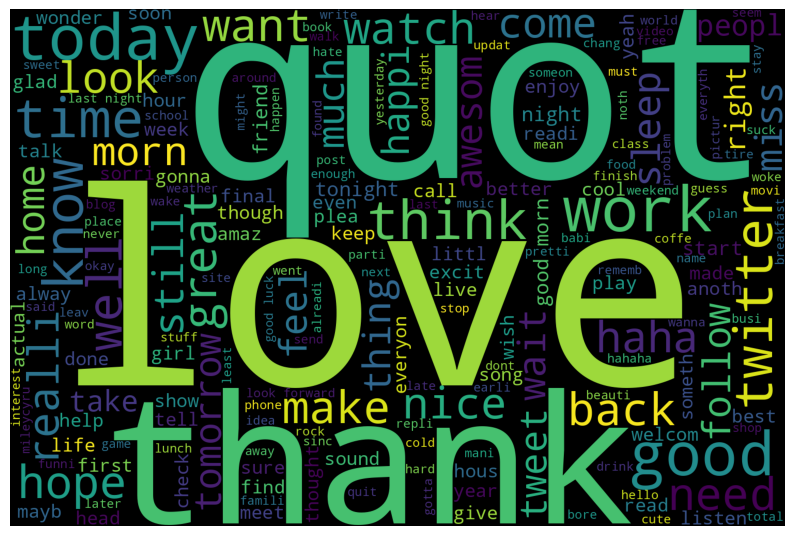

In [34]:
Create_WordCloud_for_sentiment(-1)


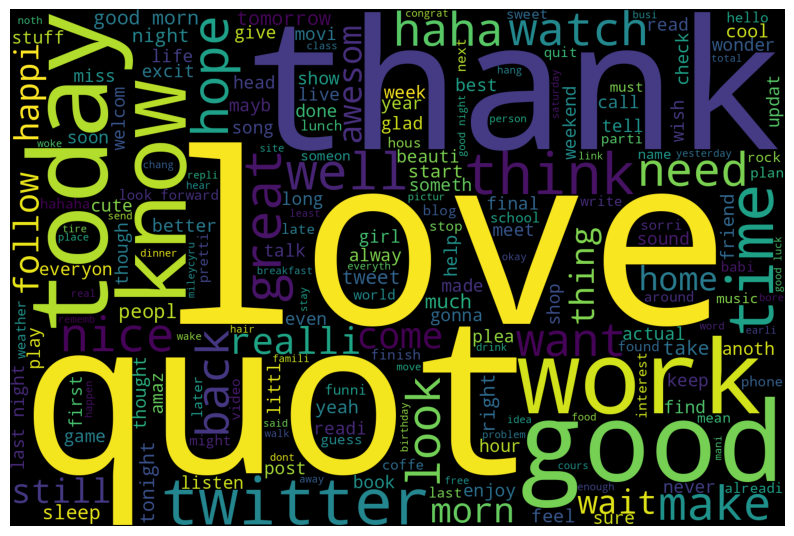

In [35]:
Create_WordCloud_for_sentiment(4)


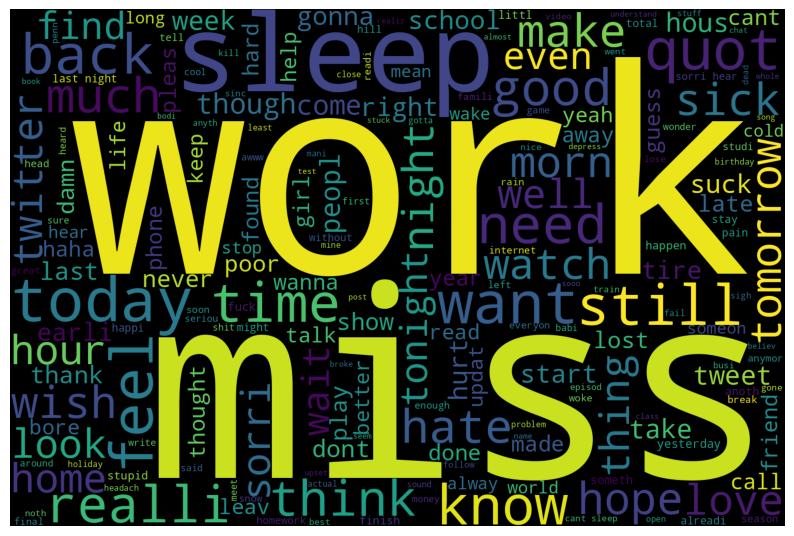

In [36]:
Create_WordCloud_for_sentiment(0)


In [37]:
def createPieChartFor(t_df):
    cnt = 100*t_df.value_counts()
    cnt/=len(t_df)

    # Set the data for pie chart
    labls = t_df.value_counts().index.values
    szs =  cnt

    # Set the Labels
    fig1, ax1 = plt.subplots()
    ax1.pie(szs, autopct='%1.2f%%', labels=labls,  shadow=True, startangle=90)
    ax1.axis('equal')  # Aspect ratio Equal shows that pie is drawn as a circle.
    plt.show()

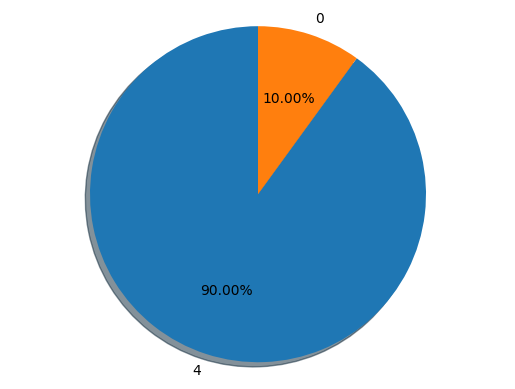

In [38]:
createPieChartFor(df_tweetdata.target)


In [39]:
df_tweetdata.head()


,target,TweetText,clean_tweet
800000,4,I LOVE @Health4UandPets u guys r the best!!,love health uandpet best
800001,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,meet besti tonight cant wait girl talk
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter sunisa meet show area sweetheart
800003,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much real food friend make soup
800004,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


In [40]:
df_tweet_train, df_tweet_test = train_test_split(df_tweetdata, test_size=0.3, random_state=42)


In [41]:
df_tweet_train.head()

,target,TweetText,clean_tweet
817218,4,Today I fell in love ... with myself. AMAZING,today fell love amaz
815188,4,@BransonPro Did it all in PHP,bransonpro
811295,4,@ladybug1988 I loved your video Laura!,ladybug love video laura
1772,0,TV w/charley she is too cute and too sweet...trying to get over the blues cheer me up tweeters,charley cute sweet blue cheer tweeter
813072,4,@lyptis yeah i'm just rephotographing some of my older stock to list in my new store no new designing today!,lypti yeah rephotograph older stock list store design today


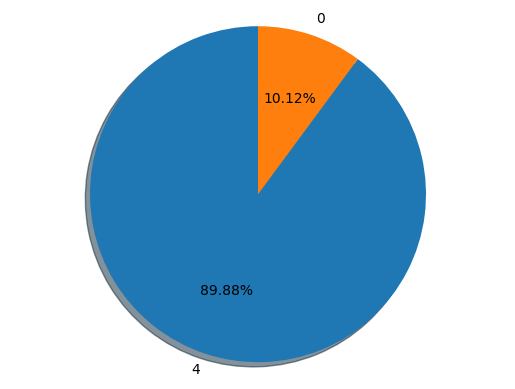

In [42]:
createPieChartFor(df_tweet_train.target)


In [43]:
lst_tweets_train =[]
lst_tweets_test =[]

for twet in df_tweet_train.clean_tweet:
    lst_tweets_train.append(twet)

for twet in df_tweet_test.clean_tweet:
    lst_tweets_test.append(twet)


In [44]:
lst_tweets_train[:10]


['today fell love amaz',
 'bransonpro',
 'ladybug love video laura',
 'charley cute sweet blue cheer tweeter',
 'lypti yeah rephotograph older stock list store design today',
 'derek shwe sweet except stretch browser watch twit',
 'activ facebook account remov iphon good feel overal realli',
 'twitter',
 'noth like come back work sick much catch oniisan shave',
 'megan rais hand friend either twitter excit live']

In [45]:
vectorizer = TfidfVectorizer()
tweet_tfidf_train = vectorizer.fit_transform(lst_tweets_train)
tweet_tfidf_test = vectorizer.transform(lst_tweets_test)


In [46]:
# let's look at the dataframe
df_train_tfidf = pd.DataFrame(tweet_tfidf_train.toarray(), columns=vectorizer.get_feature_names_out())
print(df_train_tfidf.shape)
df_train_tfidf.head()


(14000, 17367)


,aaaaaa,aaaaag,aaaaand,aaaah,aaaand,aaah,aaand,aaaw,aaaww,aabink,...,zukyleigh,zulkey,zulu,zuraidah,zurairi,zurich,zuzusu,zzap,zzzz,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
classifier = [KNeighborsClassifier(n_neighbors = 5),
              DecisionTreeClassifier(),
            #   XGBClassifier(max_depth=6,
            #   n_estimators=1000, nthread= 3),
              MultinomialNB(),
              RandomForestClassifier(n_estimators=1000, random_state=42),
              LogisticRegression(),
              svm.SVC(),
              MLPClassifier(random_state=1, max_iter=200) ]
clss_name = []

In [48]:
lbl_actual = df_tweet_test.target
tmp = 0
accu = []
for clf in classifier :
    mdl = clf.fit(tweet_tfidf_train,df_tweet_train.target)
    labl_predicted = mdl.predict(tweet_tfidf_test)
    cnt = (100*accuracy_score(labl_predicted, lbl_actual))
    cnt = round(cnt,2)
    accu.append(cnt)
    clss_name.append(clf.__class__.__name__)
    print (f'{clss_name[tmp]}  Accuracy Score : {cnt}')
    print (classification_report(labl_predicted, lbl_actual))
    tmp +=1

KNeighborsClassifier  Accuracy Score : 89.88
              precision    recall  f1-score   support

           0       0.04      0.33      0.07        70
           4       0.99      0.91      0.95      5930

    accuracy                           0.90      6000
   macro avg       0.52      0.62      0.51      6000
weighted avg       0.98      0.90      0.94      6000

DecisionTreeClassifier  Accuracy Score : 85.38
              precision    recall  f1-score   support

           0       0.28      0.26      0.27       620
           4       0.92      0.92      0.92      5380

    accuracy                           0.85      6000
   macro avg       0.60      0.59      0.59      6000
weighted avg       0.85      0.85      0.85      6000

MultinomialNB  Accuracy Score : 90.3
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           4       1.00      0.90      0.95      5999

    accuracy                           0.90      6000

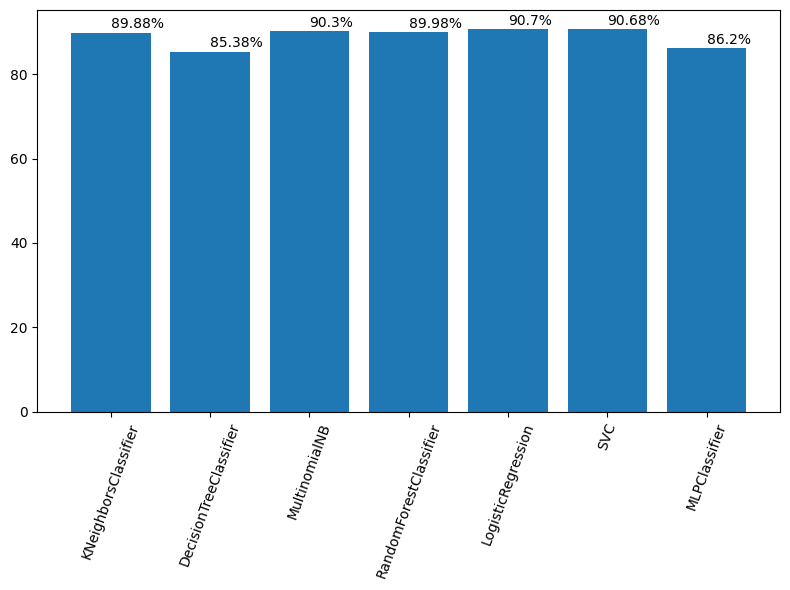

In [49]:
plt.figure(figsize=(8,6))
plt.bar(clss_name, accu)
plt.xticks(rotation=70)
for idx,val in enumerate(accu):
    plt.text(x=idx , y =val+1 , s=f"{val}%" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()
